---
## Read all Media Cloud data
---

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [32]:
csv_files

['mc-feb21.csv',
 'mc-oct19-oct20.csv',
 'mc-may23.csv',
 'mc-dec18.csv',
 'mc-jan23csv.csv',
 'mc-dec19.csv',
 'mc-feb22.csv',
 'mc-may21.csv',
 'mc-feb23.csv',
 'mc-may19.csv',
 'mc-may18.csv',
 'mc-feb18.csv',
 'mc-ago18.csv',
 'mc-may21-jul21.csv',
 'mc-feb19.csv',
 'mc-jan19.csv',
 'mc-jun18.csv',
 'mc-jun19.csv',
 'Copia de mc-feb22.csv',
 'mc-jan18.csv',
 'mc-apr22-may22.csv',
 'mc-jun20-sep20.csv',
 'mc-jul19.csv',
 'mc-jul18.csv',
 'mc-jan21-mar21.csv',
 'mc-jun23.csv',
 'mc-jul21.csv',
 'mc-jan22.csv',
 'mc-jul23.csv',
 'mc-oct18-oct19.csv',
 'mc-jun21.csv',
 'mc-jan21.csv',
 'mc-apr21.csv',
 'mc-sep20-nov20.csv',
 'mc-jan20-feb20.csv',
 'mc-sep23.csv',
 'mc-aug23.csv',
 'mc-2016-2017.csv',
 'mc-oct20-dec20.csv',
 'mc-nov18csv.csv',
 'mc-mar23.csv',
 'media-cloud-oct15-oct16.csv',
 'mc-mar21.csv',
 'mc-apr16-jun16-23.csv',
 'mc-aug21.csv',
 'mc-sep21.csv',
 'mc-jan22csv.csv',
 'mc-mar21-may21.csv',
 'mc-mar18.csv',
 'media-cloud-oct13-oct14.csv',
 'mc-sep18.csv',
 'mc-sep19.c

In [11]:
%pwd

'/Users/trinidadbosch/Desktop/SEDS/Tesis/Data/MA-Thesis/Media Cloud/scripts'

In [9]:
# directory path where data is stored
directory_path = '/Users/trinidadbosch/Desktop/SEDS/Tesis/Data/MA-Thesis/Media Cloud/Data/'

# Get a list of CSV files in the directory
csv_files19 = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Loop through each CSV file, read it, and append it to the list
for csv_file in csv_files19:
    file_path = os.path.join(directory_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
media_urls = pd.concat(dfs, ignore_index=True)

# Display the combined DataFrame
#print(combined_df)

In [31]:
# save the urls
#media_urls.to_csv('media_urls.csv', index=False)

file_path = '/Users/trinidadbosch/Desktop/SEDS/Tesis/Data/MA-Thesis/Media Cloud/Data/media_urls.pkl'

# Save the DataFrame as a pickle file
media_urls.to_pickle(file_path)

In [32]:
pkl_url = pd.read_pickle("/Users/trinidadbosch/Desktop/SEDS/Tesis/Data/MA-Thesis/Media Cloud/Data/media_urls.pkl")

In [33]:
len(pkl_url)

192994

In [16]:
len(media_urls)-duplicates_count

122664

In [14]:
media_urls.columns

# Specify the column based on which you want to check for duplicates
column_to_check_duplicates = 'url'

# Use the sum function to count the number of duplicates in the specified column
duplicates_count = media_urls.duplicated(subset=column_to_check_duplicates).sum()

# Display the count of duplicated rows
print("Number of Duplicated URLs:", duplicates_count)

Number of Duplicated URLs: 70330


In [17]:
# Drop duplicated rows based on the specified column
media_urls_no_duplicated = media_urls.drop_duplicates(subset=column_to_check_duplicates, keep='first')

# Display the DataFrame after dropping duplicates
print("DataFrame after dropping duplicates:")
print(media_urls_no_duplicated)

DataFrame after dropping duplicates:
        ap_syndicated                collect_date  feeds  \
0               False  2021-02-01 11:29:05.575011    NaN   
1               False  2021-02-01 13:30:32.746109    NaN   
2               False  2021-02-01 13:24:21.419836    NaN   
3               False  2021-02-01 11:22:41.615668    NaN   
4               False  2021-02-01 14:26:32.665619    NaN   
...               ...                         ...    ...   
187809          False  2020-12-04 14:02:56.657850    NaN   
187810          False  2020-12-15 17:30:10.208070    NaN   
187811          False  2021-02-14 12:10:49.087490    NaN   
187812          False  2021-05-25 16:59:39.467183    NaN   
187813          False  2021-12-06 10:03:35.214087    NaN   

                                                     guid language  media_id  \
0       https://news.mongabay.com/2021/02/eye-in-the-s...       en     19317   
1                                               106833338       en      1755   
2 

In [18]:
len(media_urls_no_duplicated)

122664

In [19]:
media_urls_no_duplicated.publish_date
# Convert 'publish_date' to datetime
media_urls_no_duplicated['publish_date'] = pd.to_datetime(media_urls_no_duplicated['publish_date'], errors='coerce')

# Extract year-month
media_urls_no_duplicated['year_month'] = media_urls_no_duplicated['publish_date'].dt.to_period('M')

# Group by year-month and get the distribution
publish_date_distribution = media_urls_no_duplicated['year_month'].value_counts().sort_index()

# Display the distribution
print("Publish Date Distribution by Year-Month:")
print(publish_date_distribution)

Publish Date Distribution by Year-Month:
year_month
2013-10      81
2013-11      61
2013-12     104
2014-01     138
2014-02      79
           ... 
2023-07    5674
2023-08    4597
2023-09    5299
2023-10    4490
2023-11    3069
Freq: M, Name: count, Length: 117, dtype: int64


<ipython-input-19-1cdf7a220bae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  media_urls_no_duplicated['publish_date'] = pd.to_datetime(media_urls_no_duplicated['publish_date'], errors='coerce')
<ipython-input-19-1cdf7a220bae>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  media_urls_no_duplicated['year_month'] = media_urls_no_duplicated['publish_date'].dt.to_period('M')


In [20]:
media_urls_no_duplicated.media_name.value_counts()

media_name
Forbes                  17398
Upworthy                12260
The Street               9016
zdnet                    3787
Business Insider         3732
                        ...  
Kapitall Wire               1
Bulgaria Sega               1
The PostGame                1
cn.nytimes.com              1
nationalenquirer.com        1
Name: count, Length: 253, dtype: int64

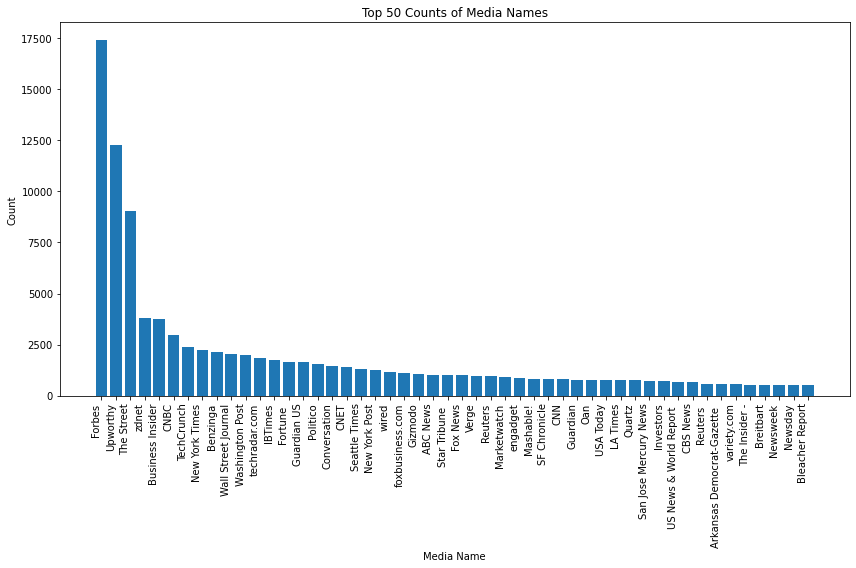

In [27]:
# Get the counts of unique values in the 'media_name' column
value_counts = media_urls_no_duplicated['media_name'].value_counts()

# Select the top 50 values
top_50_values = value_counts.head(50)

# Set a larger figure size
plt.figure(figsize=(12, 8))

# Plot a bar chart with rotated x-axis labels
plt.bar(top_50_values.index, top_50_values.values)
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability

# Add labels and title
plt.xlabel('Media Name')
plt.ylabel('Count')
plt.title('Top 50 Counts of Media Names')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [21]:
media_urls_no_duplicated = media_urls_no_duplicated.drop(["ap_syndicated", "word_count","story_tags",
                              "feeds","processed_stories_id",
                              "collect_date","metadata"], axis=1)

In [22]:
## MEdia attention that is shifting, "media pays attention as the technology advances"

# Convert 'publish_date' to datetime
media_urls_no_duplicated['publish_date'] = pd.to_datetime(media_urls_no_duplicated['publish_date'], errors='coerce')

# Extract year-month
media_urls_no_duplicated['year_month'] = media_urls_no_duplicated['publish_date'].dt.to_period('M')

# Filter for the first 5 years
first_5_years_df = media_urls_no_duplicated[media_urls_no_duplicated['publish_date'].dt.year <= media_urls_no_duplicated['publish_date'].dt.year.min() + 4]

# Filter for the next 5 years
next_5_years_df = media_urls_no_duplicated[media_urls_no_duplicated['publish_date'].dt.year > media_urls_no_duplicated['publish_date'].dt.year.min() + 4]


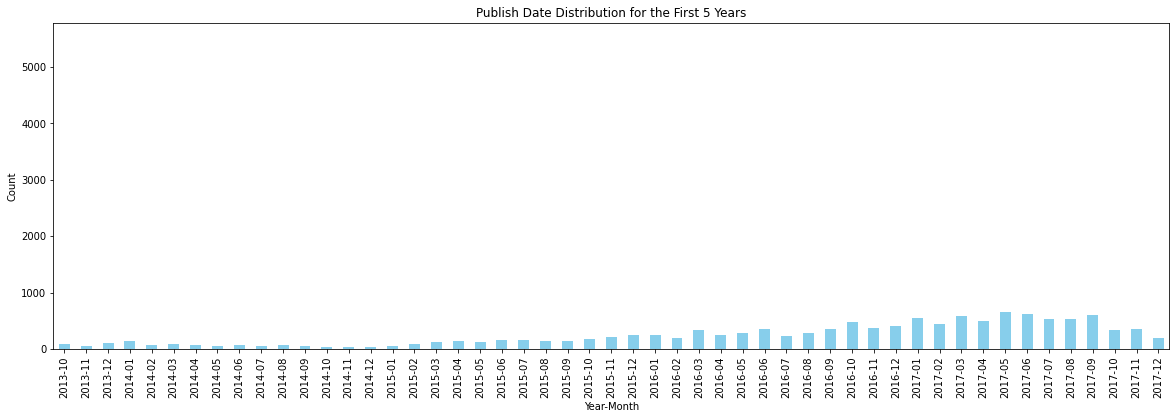

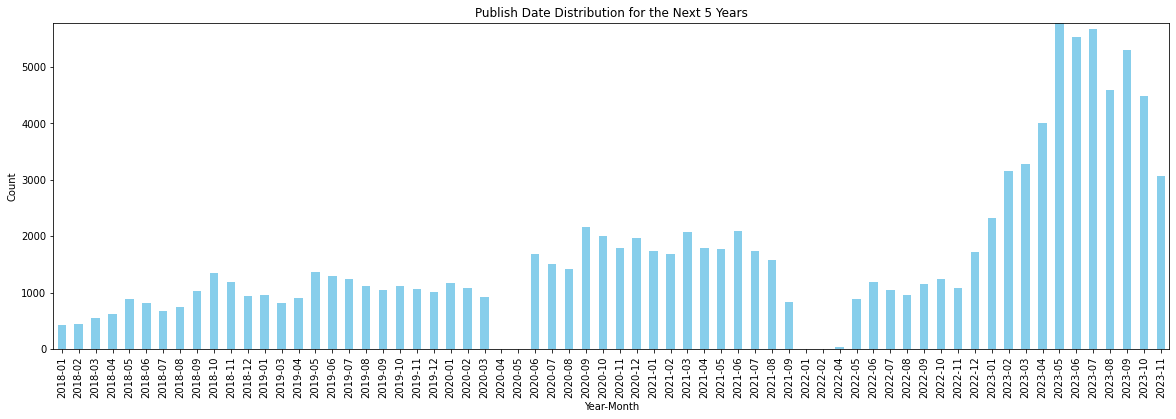

In [23]:
# Plotting the bar chart for the first 5 years
plt.figure(figsize=(20, 6))
first_5_years_counts = first_5_years_df['year_month'].value_counts().sort_index()
first_5_years_counts.plot(kind='bar', color='skyblue')
plt.title('Publish Date Distribution for the First 5 Years')
plt.xlabel('Year-Month')
plt.ylabel('Count')

# Set the same y-axis range for both plots
plt.ylim(0, max(first_5_years_counts.max(), next_5_years_df['year_month'].value_counts().max()) + 1)

plt.show()

# Plotting the bar chart for the next 5 years
plt.figure(figsize=(20, 6))
next_5_years_counts = next_5_years_df['year_month'].value_counts().sort_index()
next_5_years_counts.plot(kind='bar', color='skyblue')
plt.title('Publish Date Distribution for the Next 5 Years')
plt.xlabel('Year-Month')
plt.ylabel('Count')

# Set the same y-axis range for both plots
plt.ylim(0, max(first_5_years_counts.max(), next_5_years_counts.max()) + 1)

plt.show()

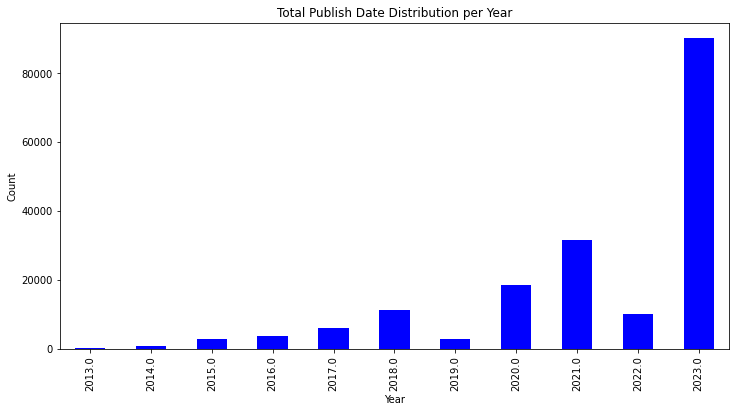

In [9]:
# Extract year
combined_df['year'] = combined_df['publish_date'].dt.year

# Plotting the bar chart for the total count per year
plt.figure(figsize=(12, 6))
combined_df['year'].value_counts().sort_index().plot(kind='bar', color='blue')
plt.title('Total Publish Date Distribution per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [10]:
combined_df

,guid,language,media_id,media_name,publish_date,stories_id,title,url,year_month,year
0,https://news.mongabay.com/2021/02/eye-in-the-s...,en,19317,Mongabay,2021-02-01 03:11:18,1838925040,Eye in the Sky: Tech makes satellite imagery i...,https://news.mongabay.com/2021/02/eye-in-the-s...,2021-02,2021.0
1,106833338,en,1755,CNBC,2021-02-01 13:28:31,1839017422,"Amazon, Alphabet and Salesforce are all invest...",https://www.cnbc.com/2021/02/01/amazon-alphabe...,2021-02,2021.0
2,19412429 at https://www.benzinga.com,en,22041,Benzinga,2021-02-01 13:17:36,1839009079,15 Big Ideas In 'Disruptive Innovation' Accord...,http://feeds.benzinga.com/~r/benzinga/~3/JWduJ...,2021-02,2021.0
3,https://eurweb.com/?p=873530,en,25336,eurweb,2021-02-01 02:05:19,1838767296,Black Creators At Sundance 2021,https://eurweb.com/2021/01/31/black-creators-a...,2021-02,2021.0
4,19427358 at https://www.benzinga.com,en,22041,Benzinga,2021-02-01 14:07:26,1839090241,Why Bill.com's Stock Is Trading Higher Today,http://feeds.benzinga.com/~r/benzinga/~3/y-hmu...,2021-02,2021.0
...,...,...,...,...,...,...,...,...,...,...
163069,https://www.reuters.com/article/us-usa-trade-c...,en,4442,Reuters,2019-01-28 16:16:01,1177633692,U.S.' Mnuchin says expects progress in China t...,http://feeds.reuters.com/~r/Reuters/worldNews/...,2019-01,2019.0
163071,https://dailycaller.com/?p=6542495,en,18775,Daily Caller,2019-01-28 16:26:35,1177614588,Facebook Expands Ad Monitoring Technology Ahea...,https://dailycaller.com/2019/01/28/facebook-mi...,2019-01,2019.0
163072,guid_105702914,en,1755,CNBC,2019-01-28 00:32:00,1177631703,China's Didi just announced a new joint ventur...,https://www.cnbc.com/2019/01/28/chinas-didi-ch...,2019-01,2019.0
163073,http://fortune.com/?p=2553307,en,1105,Fortune,2019-01-28 16:44:21,1177613361,Nvidia Shares Just Lost 14%. Wall Street Analy...,http://fortune.com/2019/01/28/nvidia-stock-fou...,2019-01,2019.0



---
## Looking for sites that blockes scraping
    From my test done on 18/nov/23 I did catch those urls that I couldnt scrape for different reasons, I want to identify which media outlets are more often blocking me from scraping their information

In [65]:
%cd cleaned-data/ 

/Users/trinidadbosch/Desktop/SEDS/Tesis/Data/Media Cloud/cleaned-data


In [66]:
tenYears = pd.read_csv("media-urls-extracted.csv")

In [95]:
tenYears

,Unnamed: 0,ID,URL,Body,MetaData,Authors,Date,Title,Tags,MetaKeywords,Summary
0,0,168079399,http://www.businessweek.com/articles/2013-10-2...,Bloomberg Businessweek\n\nCarol Massar and Tim...,Bloomberg Businessweek helps global leaders st...,[],2013-10-25 00:00:00,Businessweek,set(),[''],Bloomberg BusinessweekCarol Massar and Tim Ste...
1,1,188645324,http://www.sacbee.com/2013/12/23/6023817/uk-fi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,190849141,http://www.sacbee.com/2014/01/03/6043616/gloom...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,194150156,http://www.zdnet.com/the-future-of-shopping-wh...,The future of shopping is going to look a lot ...,The best part about the retail sector is that ...,"['Larry Dignan', 'Jan.', 'At A.M. Pt']",NaN,The future of shopping: When psychology and em...,"{'Enterprise Software', 'Digital Transformatio...",[''],Upscale vending machines that provide an exper...
4,4,197701064,http://www.sacbee.com/2014/01/27/6104790/iu-pr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2506,2506,2147256716,https://www.eastbaytimes.com/2021/12/24/japan-...,By Mari Yamaguchi | Associated Press\n\nTOKYO ...,TOKYO (AP) — Japan's Cabinet approved a record...,['Associated Press'],2021-12-24 00:00:00,Japan Cabinet OKs record defense budget amid T...,"{'Mr. Roadshow', 'Opinion Columnists', 'Pac-12...",[''],"The budget, which still needs to be approved b..."
2507,2507,2147258381,https://www.techradar.com/news/this-powerful-s...,In addition to being one of the most powerful ...,France's Jean Zay supercomputer now has an int...,"['Anthony Spadafora', 'Social Links Navigation']",2021-12-25 04:00:33+00:00,This powerful supercomputer can now run on lig...,"{'Nvidia', 'Expert Insights'}",[''],In addition to being one of the most powerful ...
2508,2508,2147270763,https://www.mercurynews.com/2021/12/24/japan-c...,By Mari Yamaguchi | Associated Press\n\nTOKYO ...,Japan’s Cabinet approved a record $47 billion ...,['Associated Press'],2021-12-24 00:00:00,Japan Cabinet OKs record defense budget amid T...,"{'Mr. Roadshow', 'Opinion Columnists', 'Pac-12...",[''],"The budget, which still needs to be approved b..."
2509,2509,2147325469,https://www.sfgate.com/news/article/12-year-ol...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# Filter rows where 'Body' column contains NaN values
nan_body_rows = tenYears[tenYears['Body'].isna()]
# Filter rows where 'Body' column does not contain NaN values
non_nan_body_rows = tenYears[~tenYears['Body'].isna()]


In [81]:
# Display the rows where 'Body' column contains NaN values
(nan_body_rows)
(non_nan_body_rows)

## so about 50% of the rows were blocked from scraping

,Unnamed: 0,ID,URL,Body,MetaData,Authors,Date,Title,Tags,MetaKeywords,Summary
0,0,168079399,http://www.businessweek.com/articles/2013-10-2...,Bloomberg Businessweek\n\nCarol Massar and Tim...,Bloomberg Businessweek helps global leaders st...,[],2013-10-25 00:00:00,Businessweek,set(),[''],Bloomberg BusinessweekCarol Massar and Tim Ste...
3,3,194150156,http://www.zdnet.com/the-future-of-shopping-wh...,The future of shopping is going to look a lot ...,The best part about the retail sector is that ...,"['Larry Dignan', 'Jan.', 'At A.M. Pt']",NaN,The future of shopping: When psychology and em...,"{'Enterprise Software', 'Digital Transformatio...",[''],Upscale vending machines that provide an exper...
8,8,318877171,http://www.inquisitr.com/1843321/japanese-scie...,Japanese researchers say they have used human ...,Japanese researchers say they have used human ...,['Johnthomas Didymus'],2015-02-15 08:34:48,Japanese Scientists Build Artificial Brain Cer...,set(),"['Sports', 'Entertainment']",Japanese researchers say they have used human ...
9,9,318981113,http://www.mercurynews.com/science/ci_27533563...,Life as a forecaster is not easy. Just ask Nat...,Stanford pair helping predict solar storms,['James Urton'],2015-02-15 17:10:17+00:00,Stanford pair helping predict solar storms,"{'Mr. Roadshow', 'Opinion Columnists', 'Pac-12...",[''],Solar flares are difficult to predict.\nStrong...
14,14,319466588,http://www.huffingtonpost.com/otto-scharmer/ul...,"We have 28,000 registered participants from 19...","Stepping back, what are we learning? We see th...","['Senior Lecturer', 'Mit', 'Co-Founder U.Lab',...",2015-02-17 15:12:52+00:00,U.Lab: Seven Principles for Revolutionizing Hi...,"{'Queer & Now', 'India', 'Social Justice', 'Hu...","['social innovation', 'Mindfulness', 'massachu...",Below is the first account of a bold experimen...
...,...,...,...,...,...,...,...,...,...,...,...
2505,2505,2147228178,https://www.newsmax.com/newsfront/kissinger-ar...,Former Secretary of State Henry Kissinger said...,"Kissinger, 98, spoke on a panel to highlight h...",['Luca Cacciatore'],2021-12-24 00:00:00,Henry Kissinger: AI Will Make Us Reconsider Wh...,"{'Donald Trump', 'Inflation', 'Newsmax TV', 'I...","['kissinger', 'artificial intelligence', 'scie...","Kissinger, 98, spoke on a panel to highlight h..."
2506,2506,2147256716,https://www.eastbaytimes.com/2021/12/24/japan-...,By Mari Yamaguchi | Associated Press\n\nTOKYO ...,TOKYO (AP) — Japan's Cabinet approved a record...,['Associated Press'],2021-12-24 00:00:00,Japan Cabinet OKs record defense budget amid T...,"{'Mr. Roadshow', 'Opinion Columnists', 'Pac-12...",[''],"The budget, which still needs to be approved b..."
2507,2507,2147258381,https://www.techradar.com/news/this-powerful-s...,In addition to being one of the most powerful ...,France's Jean Zay supercomputer now has an int...,"['Anthony Spadafora', 'Social Links Navigation']",2021-12-25 04:00:33+00:00,This powerful supercomputer can now run on lig...,"{'Nvidia', 'Expert Insights'}",[''],In addition to being one of the most powerful ...
2508,2508,2147270763,https://www.mercurynews.com/2021/12/24/japan-c...,By Mari Yamaguchi | Associated Press\n\nTOKYO ...,Japan’s Cabinet approved a record $47 billion ...,['Associated Press'],2021-12-24 00:00:00,Japan Cabinet OKs record defense budget amid T...,"{'Mr. Roadshow', 'Opinion Columnists', 'Pac-12...",[''],"The budget, which still needs to be approved b..."


In [74]:
media_urls = pd.read_csv("media-cloud-urls.csv")


2682

In [1]:
#media_urls

In [80]:
# Perform the join based on 'stories_id' and 'ID' columns
joined_df_na = media_urls.merge(nan_body_rows, left_on='stories_id', right_on='ID', how='inner')
joined_df_no_na = media_urls.merge(non_nan_body_rows, left_on='stories_id', right_on='ID', how='inner')

# Display the joined DataFrame
(joined_df_na)
joined_df_no_na

,ap_syndicated,collect_date,feeds,guid,language,media_id,media_name,media_url,metadata,processed_stories_id,...,ID,URL,Body,MetaData,Authors,Date,Title,Tags,MetaKeywords,Summary
0,False,2013-10-25 15:00:42,NaN,53329848-3ce1-11e3-b06b-d8d38560fdc0,en,5982,BusinessWeek.com,http://www.businessweek.com/,"{'date_guess_method': None, 'extractor_version...",162082723,...,168079399,http://www.businessweek.com/articles/2013-10-2...,Bloomberg Businessweek\n\nCarol Massar and Tim...,Bloomberg Businessweek helps global leaders st...,[],2013-10-25 00:00:00,Businessweek,set(),[''],Bloomberg BusinessweekCarol Massar and Tim Ste...
1,False,2014-01-15 12:06:28,NaN,7000025168,en,39330,zdnet,http://news.zdnet.com/,"{'date_guess_method': None, 'extractor_version...",179971400,...,194150156,http://www.zdnet.com/the-future-of-shopping-wh...,The future of shopping is going to look a lot ...,The best part about the retail sector is that ...,"['Larry Dignan', 'Jan.', 'At A.M. Pt']",NaN,The future of shopping: When psychology and em...,"{'Enterprise Software', 'Digital Transformatio...",[''],Upscale vending machines that provide an exper...
2,False,2015-02-15 09:02:46.964346,NaN,http://www.inquisitr.com/?p=1843321,en,26924,Inquisitr,http://www.inquisitr.com,"{'date_guess_method': None, 'extractor_version...",332796639,...,318877171,http://www.inquisitr.com/1843321/japanese-scie...,Japanese researchers say they have used human ...,Japanese researchers say they have used human ...,['Johnthomas Didymus'],2015-02-15 08:34:48,Japanese Scientists Build Artificial Brain Cer...,set(),"['Sports', 'Entertainment']",Japanese researchers say they have used human ...
3,False,2015-02-15 19:40:46.482063,NaN,http://www.mercurynews.com/science/ci_27533563...,en,35,San Jose Mercury News,http://www.mercurynews.com/,"{'date_guess_method': None, 'extractor_version...",332889045,...,318981113,http://www.mercurynews.com/science/ci_27533563...,Life as a forecaster is not easy. Just ask Nat...,Stanford pair helping predict solar storms,['James Urton'],2015-02-15 17:10:17+00:00,Stanford pair helping predict solar storms,"{'Mr. Roadshow', 'Opinion Columnists', 'Pac-12...",[''],Solar flares are difficult to predict.\nStrong...
4,False,2015-02-17 10:49:36.701139,NaN,http://www.huffingtonpost.com/otto-scharmer/ul...,en,27502,HuffPost,http://www.huffingtonpost.com/#,"{'date_guess_method': None, 'extractor_version...",333353075,...,319466588,http://www.huffingtonpost.com/otto-scharmer/ul...,"We have 28,000 registered participants from 19...","Stepping back, what are we learning? We see th...","['Senior Lecturer', 'Mit', 'Co-Founder U.Lab',...",2015-02-17 15:12:52+00:00,U.Lab: Seven Principles for Revolutionizing Hi...,"{'Queer & Now', 'India', 'Social Justice', 'Hu...","['social innovation', 'Mindfulness', 'massachu...",Below is the first account of a bold experimen...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,False,2021-12-24 22:46:01.799236,NaN,https://www.newsmax.com/newsfront/kissinger-ar...,en,25349,Newsmax,http://www.newsmax.com,"{'date_guess_method': None, 'extractor_version...",2543863836,...,2147228178,https://www.newsmax.com/newsfront/kissinger-ar...,Former Secretary of State Henry Kissinger said...,"Kissinger, 98, spoke on a panel to highlight h...",['Luca Cacciatore'],2021-12-24 00:00:00,Henry Kissinger: AI Will Make Us Reconsider Wh...,"{'Donald Trump', 'Inflation', 'Newsmax TV', 'I...","['kissinger', 'artificial intelligence', 'scie...","Kissinger, 98, spoke on a panel to highlight h..."
1074,True,2021-12-25 00:15:15.488503,NaN,https://www.eastbaytimes.com?p=8221720&preview...,en,27512,The Insider -,http://www.ibabuzz.com/insider/,"{'date_guess_method': None, 'extractor_version...",2543890838,...,2147256716,https://www.eastbaytimes.com/2021/12/24/japan-...,By Mari Yamaguchi | Associated Press\n\nTOKYO ...,TOKYO (AP) — Japan's Cabinet approved a record...,['Associated Press'],2021-12-24 00:00:00,Japan Cabinet OKs record 

In [97]:
# Count occurrences of each unique value in the 'media_url' column
media_url_counts_na = joined_df_na['media_name'].value_counts()
media_url_counts_no_na = joined_df_no_na['media_name'].value_counts()

# Display the counts
print("Media URL Counts:")
print(media_url_counts_na,media_url_counts_no_na)

Media URL Counts:
media_name
The Street                    609
Forbes                        278
Gizmodo                        45
zdnet                          45
Wall Street Journal            41
IBTimes                        37
Newsweek                       35
Star Tribune                   26
Oan                            25
Seattle Times                  24
time                           23
blogs.wsj.com                  22
ABC News                       20
Entertainment Weekly           16
Re/code                        16
ign.com                        14
SF Chronicle                   12
Reuters                        11
Inquisitr                      11
GigaOM                         10
Investors                       9
Hollywood Reporter              8
Newsweek                        8
Orange County Register          7
Deadspin                        6
Business Insider                5
Baltimore Sun                   5
Washington Post                 5
engadget           

In [90]:
# Specify the media_url you want to search for
target_media_url = 'http://www.newsweek.com/'

# Check if the media_url is in the counts
if target_media_url in media_url_counts_no_na:
    # Retrieve the count for the target media_url
    count_for_target_media_url = media_url_counts.loc[target_media_url]
    print(f"Count for {target_media_url}: {count_for_target_media_url}")
else:
    print(f"{target_media_url} not found in the counts.")

http://www.newsweek.com/ not found in the counts.


In [98]:
# Check if media_url values from media_url_counts_na are present in media_url_counts_no_na
common_media_urls = media_url_counts_na.index[media_url_counts_na.index.isin(media_url_counts_no_na.index)]

# Display common media_urls
print("Common Media URLs:")
print(common_media_urls)

Common Media URLs:
Index(['Gizmodo', 'zdnet', 'Wall Street Journal', 'Star Tribune ', 'Oan',
       'ABC News', 'Entertainment Weekly', 'Re/code', 'ign.com', 'Reuters ',
       'Inquisitr', 'Hollywood Reporter', 'Orange County Register',
       'Business Insider', 'Baltimore Sun', 'Washington Post', 'engadget',
       'New York Times', 'Guardian US', 'Alternet', 'Mashable!', 'Salon',
       'CNET', 'Chicago Tribune', 'Time', 'LA Times', 'Atlantic',
       'techradar.com', 'Quartz', 'RealClearPolitics'],
      dtype='object', name='media_name')


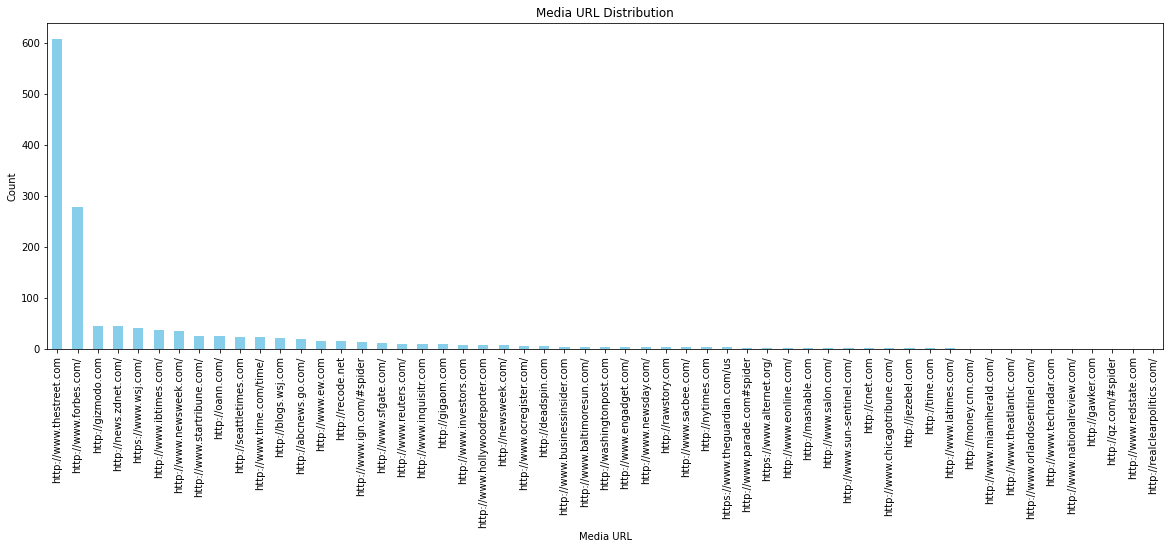

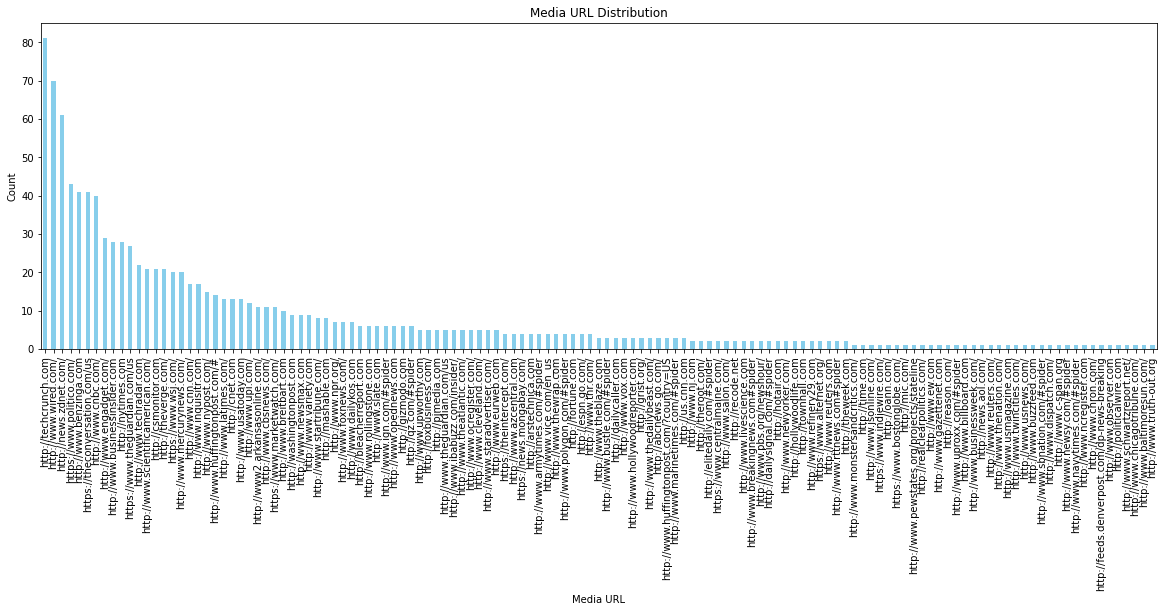

In [83]:
import matplotlib.pyplot as plt

# Plotting the bar chart for 'media_url' counts
plt.figure(figsize=(20, 6))
media_url_counts_na.plot(kind='bar', color='skyblue')
plt.title('Media URL Distribution')
plt.xlabel('Media URL')
plt.ylabel('Count')
plt.show()

# Plotting the bar chart for 'media_url' counts
plt.figure(figsize=(20, 6))
media_url_counts_no_na.plot(kind='bar', color='skyblue')
plt.title('Media URL Distribution')
plt.xlabel('Media URL')
plt.ylabel('Count')
plt.show()

In [39]:
import zstandard

ModuleNotFoundError: No module named 'zstandard'

In [40]:
pip install zstandard

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.0/921.0 kB 8.0 MB/s eta 0:00:00:00:010:01
Note: you may need to restart the kernel to use updated packages.
